### 과대적합과 과소적합

![img](images/과대_과소적합-1.png)

### 과대적합(overfitting)
* 훈련데이터에만 잘 맞고 테스트데이터에는 낮은 정답률

![img](images/과대적합.png)

### 과소적합(underfitting)
* 훈련이 제대로 이루어지지 않아 테스트 데이터보다 훈련데이터의 정답률이 낮은 경우 또는 대체적으로 예측값이 낮은 경우
* 훈련데이터의 개수가 적을 경우 과소적합이 일어난다

![img](images/과소적합.png)

### 스케일링
* 수치형 데이터들의 값의 범위가 클 경우 사용한다.(연산 속도 증가)
    - 예를 들어 주식의 가격을 생각했을 경우 100원의 1%와 100000원의 1%를 계산하고자 한다면 같은 1%연산이지만 숫자가 클 경우 연산속도에 영향을 미치게 된다.
* 서로 다른 변수의 값 범위를 일정한 수준으로 맞추고자 하는 경우
* 대표적 스케일링 클래스는 StandardScaler, MinMaxScaler이 있다
* 사용 이유
    - 연산속도를 올릴 수 있다
    - 확률을 높일 수 있다
    - 과대, 과소적합을 조금은 해결할 수 있다
* 참고
    - 이상치가 있을 경우 범위의 차이가 커지게 되므로 이상치는 제거해야 한다
    - RandomForest는 따로 스케일링 할 필요가 없다.(tree계열은 따로 스케일 할 필요가 없다)

#### StandardScaler(label값은 스케일 하지 않는다)
* 사이킷런에서 서포트벡터머신, 선형회귀, 로지스틱 회귀에 적용하는 것이 예측 성능 향상에 중요한 요소가 된다.
* 각 특성의 평균을 0, 편차를 1로 변경하여 정규분포로 만드는 것이다
    - 편차(deviation)는 예측값과 평균의 차이
    > ![image](images/정규분포.png)

#### MinMaxScaler(label값은 스케일 하지 않는다)
* 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경
* k-means, k-nearest neighbor등의 알고리즘에 좋은 성능을 보인다

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

movie = {'daum':[2,4,6,8,10], 'naver':[1,2,3,4,5]}
mv = pd.DataFrame(movie)
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [4]:
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(mv)
df_sc = pd.DataFrame(data=scaled, columns=['daum', 'naver'])
df_sc

,daum,naver
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


In [5]:
df_sc.describe()

,daum,naver
count,5.000000,5.000000
mean,0.000000,0.000000
std,1.118034,1.118034
min,-1.414214,-1.414214
25%,-0.707107,-0.707107
50%,0.000000,0.000000
75%,0.707107,0.707107
max,1.414214,1.414214


In [6]:
from sklearn.preprocessing import MinMaxScaler
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [7]:
min_max_scaler = MinMaxScaler()
min_max_mv = min_max_scaler.fit_transform(mv)
min_max_mv

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

### 스케일링

In [8]:
df = pd.read_csv('data/bank_cleaning.csv')
df.head()

,age,duration,campaign,pdays,previous,y
0,56,261,1,999,0,0
1,57,149,1,999,0,0
2,37,226,1,999,0,0
3,40,151,1,999,0,0
4,56,307,1,999,0,0


In [9]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [10]:
features = ['age', 'duration', 'campaign', 'pdays', 'previous']
label ='y'
x, y = df[features], df[label]
x, y

(       age  duration  campaign  pdays  previous
 0       56       261         1    999         0
 1       57       149         1    999         0
 2       37       226         1    999         0
 3       40       151         1    999         0
 4       56       307         1    999         0
 ...    ...       ...       ...    ...       ...
 41183   73       334         1    999         0
 41184   46       383         1    999         0
 41185   56       189         2    999         0
 41186   44       442         1    999         0
 41187   74       239         3    999         1
 
 [41188 rows x 5 columns],
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 41183    1
 41184    0
 41185    0
 41186    1
 41187    0
 Name: y, Length: 41188, dtype: int64)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.9911900385002255
0.8873512988589464


In [18]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaler = scaled.transform(x_train)
x_test_scaler = scaled.transform(x_test)

rfc.fit(x_train_scaler, y_train)

print(rfc.score(x_train_scaler, y_train))
print(rfc.score(x_test_scaler, y_test))

0.9912247233880198
0.8869466699036983


In [20]:
scaled = MinMaxScaler()
scaled.fit(x_train)

x_train_scaler = scaled.transform(x_train)
x_test_scaler = scaled.transform(x_test)

rfc.fit(x_train_scaler, y_train)

print(rfc.score(x_train_scaler, y_train))
print(rfc.score(x_test_scaler, y_test))

0.9912247233880198
0.8871894472768471


### 상관관계
* 특정 변수들 끼리의 관계가 높은 값을 제거하면 과적합을 줄일 수 있다

In [21]:
df.corr()

,age,duration,campaign,pdays,previous,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,0.230181
y,0.030399,0.405274,-0.066357,-0.324914,0.230181,1.000000


<Axes: >

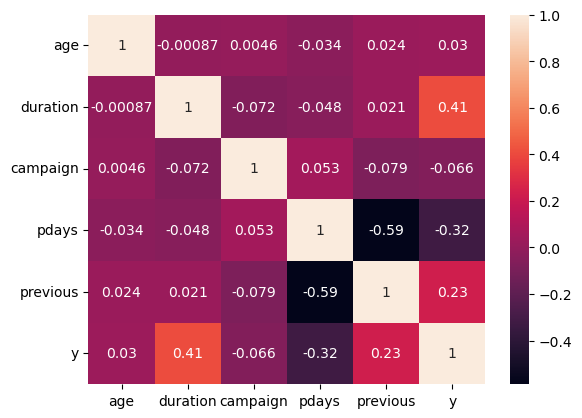

In [22]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [23]:
df.head()

,age,duration,campaign,pdays,previous,y
0,56,261,1,999,0,0
1,57,149,1,999,0,0
2,37,226,1,999,0,0
3,40,151,1,999,0,0
4,56,307,1,999,0,0


In [24]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [25]:
features = ['age', 'campaign', 'pdays', 'previous']
label='y'
x, y = df[features], df[label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.9114841663487219
0.896091284292304


In [26]:
scaled = StandardScaler()
scaled.fit(x)
x_scaler = scaled.transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

NameError: name 'X' is not defined

### 타이타닉 스케일

In [27]:
df = pd.read_csv('data/titanic_cleaning.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [29]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
label = "Survived"
x, y = df[features], df[label]

### standardScaler

In [30]:
standard_s = StandardScaler()
standard_s.fit(x)
x_standard = standard_s.transform(x)

### min-max-scaler

In [31]:
min_max_s = MinMaxScaler()
min_max_s.fit(x)
x_min_max = min_max_s.transform(x)

### 훈련 및 테스트 데이터 분리

In [33]:
# 스케일 없는 데이터
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#standard scaler
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_standard, y, test_size=0.2)
#min max scaler
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_min_max, y, test_size=0.2)

### 모델 생성 및 평가
#### svc-linear 모델

In [34]:
from sklearn.svm import SVC
svc_linear = SVC(kernel="linear")
svc_linear.fit(x_train, y_train)
# 스케일 없는 데이터 셋
print("train : ", svc_linear.score(x_train, y_train))
print("test : ", svc_linear.score(x_test, y_test))

train :  0.7780898876404494
test :  0.8212290502793296


### 스탠다드

In [35]:
svc_linear = SVC(kernel="linear")
svc_linear.fit(x_train_s, y_train_s)
# 스케일 없는 데이터 셋
print("train : ", svc_linear.score(x_train_s, y_train_s))
print("test : ", svc_linear.score(x_test_s, y_test_s))

train :  0.7907303370786517
test :  0.770949720670391


### 민맥스

In [36]:
svc_linear = SVC(kernel="linear")
svc_linear.fit(x_train_m, y_train_m)
# 스케일 없는 데이터 셋
print("train : ", svc_linear.score(x_train_m, y_train_m))
print("test : ", svc_linear.score(x_test_m, y_test_m))

train :  0.7893258426966292
test :  0.776536312849162
